In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

csv_file_path='top200_1997.xlsx'

df = pd.read_excel(csv_file_path)
df.head()

,證券代碼,簡稱,年月,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,...,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率,Return,ReturnMean_year_Label
0,19972330.0,台積電,199712.0,457105.0,15.24,3.4636,0.89594,1.41640,0.144140,0.223790,...,0.408870,0.55256,223.86,177.18,5.99,6.34,-18.13,-8.00,-6.3648,1.0
1,2303.0,聯電,199712.0,263536.0,20.55,9.1333,1.27240,3.38550,0.111460,0.145880,...,0.388200,0.30889,338.15,303.48,5.27,6.80,-41.39,27.37,-18.0049,1.0
2,2002.0,中鋼,199712.0,181781.0,5.53,2.6209,0.35770,0.42117,0.077890,0.136380,...,0.160150,0.75094,85.46,26.60,4.10,22.41,44.39,63.01,-9.2224,1.0
3,1303.0,南亞,199712.0,175637.0,14.81,6.6116,0.74949,0.40821,0.035977,0.099458,...,0.061046,1.76440,133.30,80.55,4.36,7.00,8.65,-15.94,-12.0864,1.0
4,2357.0,華碩,199712.0,166991.0,158.47,7.0746,2.59620,2.39490,0.300880,0.356970,...,0.329330,0.18643,556.46,476.72,7.60,23.93,52.07,84.82,46.2737,1.0


In [23]:
from sklearn.preprocessing import StandardScaler

columns_to_exclude = ['簡稱', '證券代碼', '年月','ReturnMean_year_Label']

# 排除指定的欄位
features_to_scale = df.drop(columns=columns_to_exclude)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# 將標準化後的特徵資料轉換為 DataFrame
df_feat = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
df_feat.head()

,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,營業利益率OPM,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率,Return
0,9.522117,-0.335092,-0.060623,-0.370416,-0.312907,1.454294,1.423924,2.971872,2.582918,-0.611436,0.183285,0.525878,-0.088286,-0.248544,-0.105409,-0.413608,0.342587
1,5.231831,-0.259893,-0.038129,-0.264764,0.162296,0.884739,0.519556,0.682545,2.402131,-1.081365,1.174071,1.744121,-0.113169,-0.224163,-0.110777,-0.292221,0.013387
2,3.419803,-0.472602,-0.063967,-0.521471,-0.553085,0.299672,0.409282,1.670479,0.407519,-0.228851,-1.016512,-0.926561,-0.153606,0.603203,-0.090981,-0.169907,0.261769
3,3.283627,-0.341182,-0.048133,-0.411517,-0.556213,-0.430800,-0.019304,0.082855,-0.459282,1.725653,-0.601785,-0.406180,-0.144620,-0.213562,-0.099229,-0.440858,0.180771
4,3.091996,1.693289,-0.046297,0.106755,-0.076766,4.186002,2.969858,2.153807,1.887231,-1.317535,3.066612,3.415131,-0.032643,0.683767,-0.089208,-0.095057,1.831282


In [24]:
from itertools import combinations
# 所有的欄位
all_columns = ['市值(百萬元)', '收盤價(元)_年', '本益比', '股價淨值比', '股價營收比', 'M淨值報酬率─稅後', '資產報酬率ROA', '營業利益率OPM', '利潤邊際NPM', '負債/淨值比', 'M流動比率', 'M速動比率', 'M存貨週轉率 (次)', 'M應收帳款週轉次', 'M營業利益成長率', 'M稅後淨利成長率']

# 開始的欄位
start_column = '本益比'

# 開始欄位的索引
start_index = all_columns.index(start_column)

# 創建一個字典來保存結果
column_combinations_dict = {}

# 生成所有可能的欄位組合
for i in range(1, len(all_columns) - start_index + 1):
    for subset in combinations(all_columns[start_index:], i):
        selected_columns = list(subset)
        # 將結果存入字典
        column_combinations_dict[len(column_combinations_dict) + 1] = selected_columns

# 打開一個檔案來保存結果
with open('column_combinations.txt', 'w') as file:
    # 遍歷字典，將結果寫入檔案
    for key, value in column_combinations_dict.items():
        file.write(f"Key: {key}, Selected Columns: {value}\n")
        # 在這裡進行你的分析或模型擬合等操作
        # ...
        file.write("\n" + "="*40 + "\n")

# 提示保存成功
print("Results saved to 'column_combinations.txt'")


Results saved to 'column_combinations.txt'


        本益比
0 -0.060623
1 -0.038129
2 -0.063967
3 -0.048133
4 -0.046297
          本益比
0   -0.060623
1   -0.038129
2   -0.063967
3   -0.048133
4   -0.046297
..        ...
195 -0.020360
196 -0.029794
197 -0.045048
198  0.015946
199 -0.048958

[200 rows x 1 columns]
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195   -1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: ReturnMean_year_Label, Length: 200, dtype: float64
          本益比
85  -0.021605
183  0.006969
127  0.069751
53   0.101419
100  0.026539
..        ...
63  -0.030793
70  -0.045646
81   0.006834
11   0.730437
95  -0.198790

[140 rows x 1 columns] 85    -1.0
183    1.0
127   -1.0
53    -1.0
100   -1.0
      ... 
63     1.0
70     1.0
81     1.0
11     1.0
95    -1.0
Name: ReturnMean_year_Label, Length: 140, dtype: float64


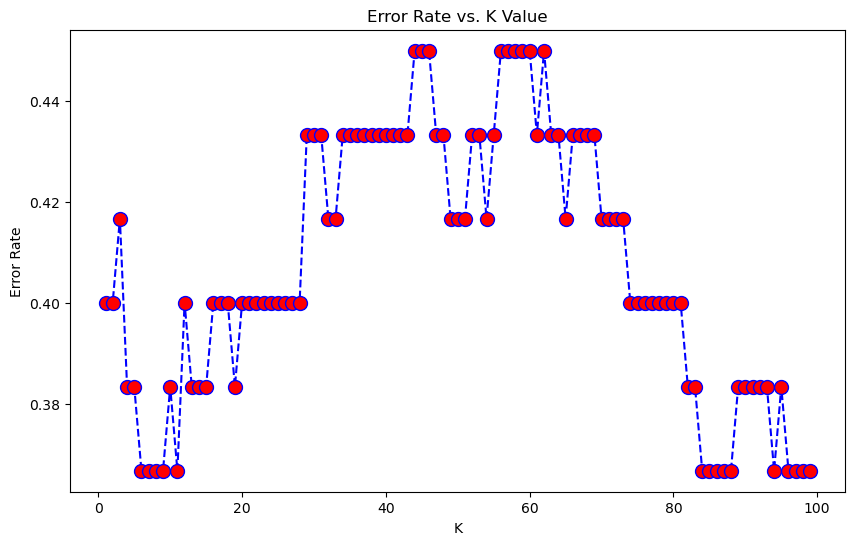

Optimal k value for minimum error rate: 6
Minimum Error Rate: 0.36666666666666664
confusion_matrix:
[[69 57]
 [48 26]]
classification_report
              precision    recall  f1-score   support

          -1       0.59      0.55      0.57       126
           1       0.31      0.35      0.33        74

    accuracy                           0.48       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.49      0.47      0.48       200

新數據的預測準確率: 0.475
選擇股票:
1      華碩         
3      中鋼         
5      鴻海         
7       日月光       
9      宏電         
          ...     
191     劍湖山       
194    中電         
196    中友         
197    春源         
199    東泥         
Name: 簡稱, Length: 83, dtype: object
0.9803396506024097
最近鄰居中預測值為1的前5筆索引:
[132, 139, 120, 125, 95]
132    皇旗         
139    中纖         
120    智邦         
125    精英         
95     長億         
Name: 簡稱, dtype: object
132    -24.6979
139    -18.3888
120    153.0937
125     80.1532
95     -33.8082
Nam

confusion_matrix:
[[55 57]
 [47 41]]
classification_report
              precision    recall  f1-score   support

          -1       0.54      0.49      0.51       112
           1       0.42      0.47      0.44        88

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.48      0.48       200

新數據的預測準確率: 0.48
選擇股票:
0       台積電       
4       聯發科       
6      友達         
10      宏達電       
13     遠傳         
          ...     
192    永信         
193    新保         
194    泰林         
197    圓剛         
199    台聚         
Name: 簡稱, Length: 98, dtype: object
1.227660921632653
最近鄰居中預測值為1的前5筆索引:
[65, 43, 47, 91, 126]
65     正崴         
43     勝華         
47     和泰         
91     金寶         
126    輔祥         
Name: 簡稱, dtype: object
65     23.257200
43    -31.133600
47     -0.064298
91     -0.974310
126   -32.987200
Name: Return, dtype: float64
0.916195584
confusion_matrix:
[[80 35]
 [52 33]]
classif

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion_matrix:
[[161  39]
 [  0   0]]
classification_report
              precision    recall  f1-score   support

        -1.0       1.00      0.81      0.89       200
         1.0       0.00      0.00      0.00         0

    accuracy                           0.81       200
   macro avg       0.50      0.40      0.45       200
weighted avg       1.00      0.81      0.89       200

新數據的預測準確率: 0.805
選擇股票:
0       台積電       
1      鴻海         
2       台塑化       
6      中鋼         
13     宏碁         
20      日月光       
22     統一         
26     鴻準         
34     聯強         
37      統一超       
45     可成         
58     立錡         
61     茂迪         
62     瑞昱         
65     福懋         
73     景碩         
75     研華         
76     華新         
89     豐興         
95     昱晶         
101    南港         
105    世界         
108    智冠         
140     福懋科       
151    東貝         
152    兆赫         
155    南紡         
159    中橡         
169    矽統         
173    晶技         
177    建漢        

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


      股價淨值比
0 -0.370416
1 -0.264764
2 -0.521471
3 -0.411517
4  0.106755
        股價淨值比
0   -0.370416
1   -0.264764
2   -0.521471
3   -0.411517
4    0.106755
..        ...
195 -0.198700
196 -0.385355
197 -0.456510
198 -0.322633
199 -0.456397

[200 rows x 1 columns]
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195   -1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: ReturnMean_year_Label, Length: 200, dtype: float64
        股價淨值比
85  -0.377904
183  0.180733
127 -0.097387
53   0.180340
100 -0.416501
..        ...
63  -0.389404
70  -0.364211
81   0.282720
11   2.303706
95  -0.255138

[140 rows x 1 columns] 85    -1.0
183    1.0
127   -1.0
53    -1.0
100   -1.0
      ... 
63     1.0
70     1.0
81     1.0
11     1.0
95    -1.0
Name: ReturnMean_year_Label, Length: 140, dtype: float64


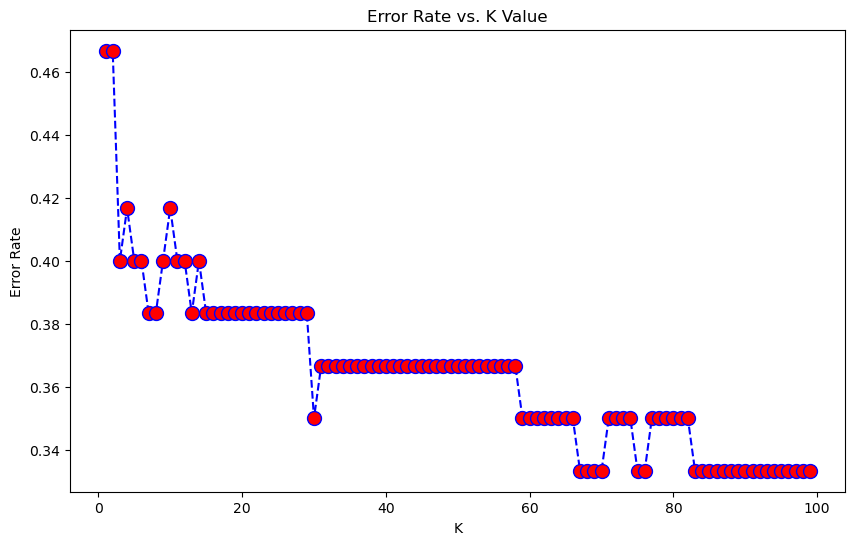

Optimal k value for minimum error rate: 67
Minimum Error Rate: 0.3333333333333333
confusion_matrix:
[[83 43]
 [49 25]]
classification_report
              precision    recall  f1-score   support

          -1       0.63      0.66      0.64       126
           1       0.37      0.34      0.35        74

    accuracy                           0.54       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.53      0.54      0.54       200

新數據的預測準確率: 0.54
選擇股票:
4      台塑         
5      鴻海         
9      宏電         
11     仁寶         
12     台化         
          ...     
181    美格         
188     中興電       
189    基泰         
197    春源         
199    東泥         
Name: 簡稱, Length: 68, dtype: object
1.154539838235294
最近鄰居中預測值為1的前5筆索引:
[5, 108, 117, 91, 63]
5      鴻海         
108    和桐         
117    東陽         
91     國產         
63      統一實       
Name: 簡稱, dtype: object
5      87.7049
108   -11.8421
117   -24.1624
91    -24.1580
63    -32.4153
Name: Return,

confusion_matrix:
[[60 55]
 [36 49]]
classification_report
              precision    recall  f1-score   support

          -1       0.62      0.52      0.57       115
           1       0.47      0.58      0.52        85

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.56      0.55      0.55       200

新數據的預測準確率: 0.545
選擇股票:
2       台塑化       
3       中華電       
4      南亞         
5      聯電         
6      中鋼         
          ...     
184    聯成         
193    聯華         
194     大聯大       
197     金像電       
199    年興         
Name: 簡稱, Length: 104, dtype: object
1.1573444384615383
最近鄰居中預測值為1的前5筆索引:
[131, 48, 17, 114, 30]
131    三陽         
48     華新         
17      日月光       
114     永豐餘       
30     統一         
Name: 簡稱, dtype: object
131   -20.0196
48    -16.5385
17      6.0419
114    -9.8662
30     45.8279
Name: Return, dtype: float64
1.010891
confusion_matrix:
[[67 45]
 [39 49]]
classification_r

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


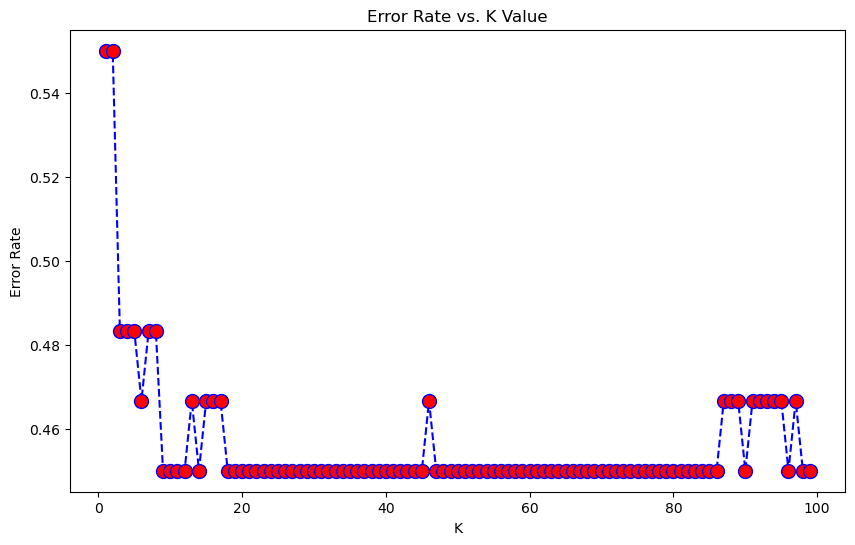

Optimal k value for minimum error rate: 9
Minimum Error Rate: 0.45
confusion_matrix:
[[90 36]
 [56 18]]
classification_report
              precision    recall  f1-score   support

          -1       0.62      0.71      0.66       126
           1       0.33      0.24      0.28        74

    accuracy                           0.54       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.51      0.54      0.52       200

新數據的預測準確率: 0.54
選擇股票:
7       日月光       
8       華邦電       
12     台化         
14     茂矽         
15     裕隆         
16     中華         
19     亞泥         
24     寶成         
27     國巨         
32     錸德         
35     大眾         
36     台玻         
38     國建         
43     正新         
51     矽統         
52     友訊         
58     年興         
60     飛瑞         
64     南紡         
66     士電         
76     中強         
80     碧悠         
84     永大         
92      嘉食化       
93     台苯         
95     長億         
97     國聯         
103    耀文   

confusion_matrix:
[[60 52]
 [42 46]]
classification_report
              precision    recall  f1-score   support

          -1       0.59      0.54      0.56       112
           1       0.47      0.52      0.49        88

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.53      0.53       200

新數據的預測準確率: 0.53
選擇股票:
1      鴻海         
7      台塑         
11     宏碁         
12     廣達         
14      台灣大       
          ...     
191    盛餘         
193    新保         
196    華孚         
198    群聯         
199    台聚         
Name: 簡稱, Length: 98, dtype: object
1.2830267175510204
最近鄰居中預測值為1的前5筆索引:
[34, 68, 103, 76, 59]
34     神達         
68     健鼎         
103    豐泰         
76      中光電       
59      裕日車       
Name: 簡稱, dtype: object
34     -7.6992
68     41.4467
103    -6.2811
76     -1.4257
59    -19.2468
Name: Return, dtype: float64
1.0135878
confusion_matrix:
[[57 58]
 [36 49]]
classification_rep

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


     M淨值報酬率─稅後
0     1.454294
1     0.884739
2     0.299672
3    -0.430800
4     4.186002
..         ...
195   0.453999
196  -0.250365
197   0.156847
198  -0.713782
199  -0.519004

[200 rows x 1 columns]
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195   -1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: ReturnMean_year_Label, Length: 200, dtype: float64
     M淨值報酬率─稅後
85   -0.550479
183  -0.568030
127  -0.338273
53   -0.669201
100  -0.806326
..         ...
63   -0.683370
70    0.412851
81    0.120335
11   -0.739193
95   -1.405162

[140 rows x 1 columns] 85    -1.0
183    1.0
127   -1.0
53    -1.0
100   -1.0
      ... 
63     1.0
70     1.0
81     1.0
11     1.0
95    -1.0
Name: ReturnMean_year_Label, Length: 140, dtype: float64


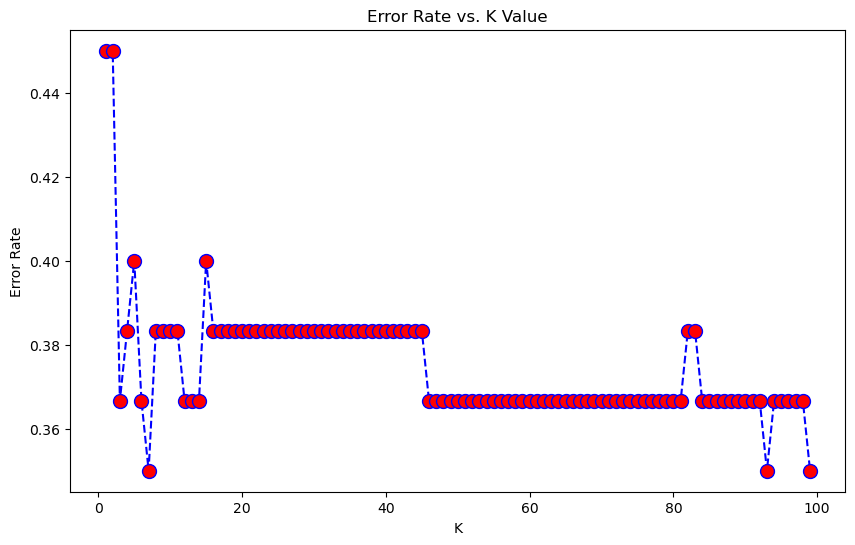

Optimal k value for minimum error rate: 7
Minimum Error Rate: 0.35
confusion_matrix:
[[61 65]
 [43 31]]
classification_report
              precision    recall  f1-score   support

          -1       0.59      0.48      0.53       126
           1       0.32      0.42      0.36        74

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.49      0.46      0.47       200

新數據的預測準確率: 0.46
選擇股票:
1      華碩         
2      南亞         
3      中鋼         
4      台塑         
5      鴻海         
          ...     
194    中電         
196    中友         
197    春源         
198    英群         
199    東泥         
Name: 簡稱, Length: 96, dtype: object
1.0525842604166666
最近鄰居中預測值為1的前5筆索引:
[32, 41, 87, 23, 24]
32    錸德         
41    三陽         
87    宏遠         
23    長榮         
24    寶成         
Name: 簡稱, dtype: object
32    156.4490
41    -25.1426
87    -54.6809
23     -1.1512
24     25.5390
Name: Return, dtype: float64
1.20

confusion_matrix:
[[58 54]
 [42 46]]
classification_report
              precision    recall  f1-score   support

          -1       0.58      0.52      0.55       112
           1       0.46      0.52      0.49        88

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.52      0.52       200

新數據的預測準確率: 0.52
選擇股票:
0       台積電       
1      鴻海         
2       台塑化       
4       中華電       
5      台塑         
          ...     
188    訊連         
190    鈊象         
194     華新科       
198    川湖         
199    宏盛         
Name: 簡稱, Length: 100, dtype: object
0.5098446849999999
最近鄰居中預測值為1的前5筆索引:
[99, 70, 9, 20, 52]
99    長興         
70    華寶         
9      聯發科       
20     遠東新       
52    欣興         
Name: 簡稱, dtype: object
99   -46.3247
70   -74.0561
9    -42.2294
20   -40.4734
52   -73.9165
Name: Return, dtype: float64
0.44599980000000006
confusion_matrix:
[[67 50]
 [48 35]]
classification_repo

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   資產報酬率ROA
0  1.423924
1  0.519556
2  0.409282
3 -0.019304
4  2.969858
     資產報酬率ROA
0    1.423924
1    0.519556
2    0.409282
3   -0.019304
4    2.969858
..        ...
195 -0.027917
196 -0.311369
197 -0.250462
198 -0.691468
199 -0.346866

[200 rows x 1 columns]
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195   -1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: ReturnMean_year_Label, Length: 200, dtype: float64
     資產報酬率ROA
85  -0.485080
183 -0.088660
127 -0.580857
53  -0.496201
100 -0.843310
..        ...
63  -0.420958
70   0.158320
81   0.257219
11  -0.687045
95  -1.533502

[140 rows x 1 columns] 85    -1.0
183    1.0
127   -1.0
53    -1.0
100   -1.0
      ... 
63     1.0
70     1.0
81     1.0
11     1.0
95    -1.0
Name: ReturnMean_year_Label, Length: 140, dtype: float64


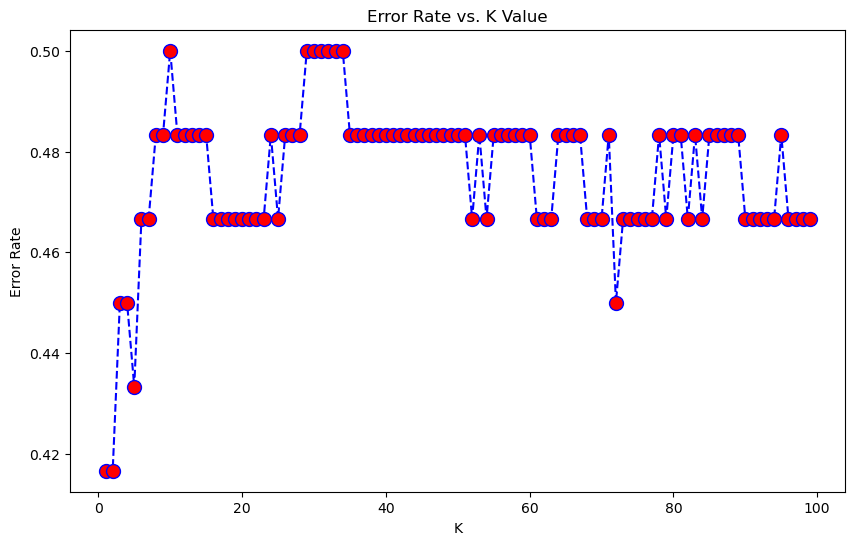

Optimal k value for minimum error rate: 1
Minimum Error Rate: 0.4166666666666667
confusion_matrix:
[[68 58]
 [40 34]]
classification_report
              precision    recall  f1-score   support

          -1       0.63      0.54      0.58       126
           1       0.37      0.46      0.41        74

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.53      0.51      0.52       200

新數據的預測準確率: 0.51
選擇股票:
4      台塑         
5      鴻海         
7       日月光       
8       華邦電       
9      宏電         
          ...     
189    基泰         
190    台揚         
192    高林         
194    中電         
195    嘉裕         
Name: 簡稱, Length: 92, dtype: object
1.1314286739130435
最近鄰居中預測值為1的前5筆索引:
[9, 10, 75, 25, 95]
9     宏電         
10    華通         
75    六福         
25    旺宏         
95    長億         
Name: 簡稱, dtype: object
9     191.3663
10      5.8307
75    -64.3935
25    160.4932
95    -33.8082
Name: Return, dtype:

confusion_matrix:
[[56 56]
 [43 45]]
classification_report
              precision    recall  f1-score   support

          -1       0.57      0.50      0.53       112
           1       0.45      0.51      0.48        88

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200

新數據的預測準確率: 0.505
選擇股票:
0       台積電       
3      南亞         
4       中華電       
5      台塑         
8      台化         
          ...     
195     海韻電       
196    華立         
197     精成科       
198    川湖         
199    宏盛         
Name: 簡稱, Length: 101, dtype: object
0.50174550990099
最近鄰居中預測值為1的前5筆索引:
[99, 39, 13, 60, 29]
99    長興         
39    緯創         
13     奇美電       
60     中美晶       
29     光寶科       
Name: 簡稱, dtype: object
99   -46.3247
39   -53.3456
13   -74.6757
60   -71.8365
29   -57.0761
Name: Return, dtype: float64
0.3934828
confusion_matrix:
[[54 63]
 [35 48]]
classification_report
       

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


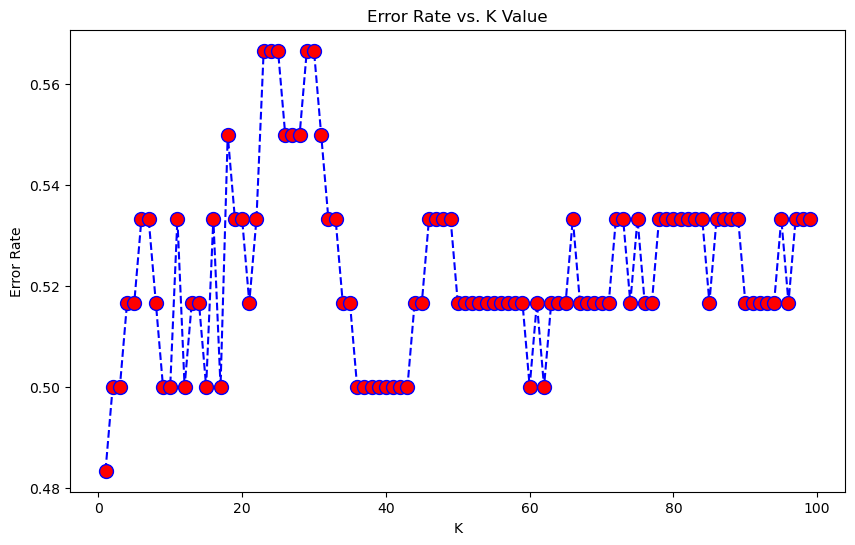

Optimal k value for minimum error rate: 1
Minimum Error Rate: 0.48333333333333334
confusion_matrix:
[[77 49]
 [40 34]]
classification_report
              precision    recall  f1-score   support

          -1       0.66      0.61      0.63       126
           1       0.41      0.46      0.43        74

    accuracy                           0.56       200
   macro avg       0.53      0.54      0.53       200
weighted avg       0.57      0.56      0.56       200

新數據的預測準確率: 0.555
選擇股票:
2      南亞         
6       英業達       
9      宏電         
10     華通         
12     台化         
          ...     
191     劍湖山       
192    高林         
195    嘉裕         
196    中友         
197    春源         
Name: 簡稱, Length: 83, dtype: object
1.197207626506024
最近鄰居中預測值為1的前5筆索引:
[32, 67, 109, 87, 27]
32     錸德         
67     和泰         
109    聯華         
87     宏遠         
27     國巨         
Name: 簡稱, dtype: object
32     156.4490
67     -35.3733
109    -19.8123
87     -54.6809
27       1.1840
Name: R

confusion_matrix:
[[75 37]
 [41 47]]
classification_report
              precision    recall  f1-score   support

          -1       0.65      0.67      0.66       112
           1       0.56      0.53      0.55        88

    accuracy                           0.61       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.61      0.61      0.61       200

新數據的預測準確率: 0.61
選擇股票:
0       台積電       
4       中華電       
6      中鋼         
7      友達         
9       聯發科       
          ...     
188    訊連         
190    鈊象         
195     海韻電       
198    川湖         
199    宏盛         
Name: 簡稱, Length: 84, dtype: object
0.5274412202380954
最近鄰居中預測值為1的前5筆索引:
[111, 26, 28, 61, 62]
111    國建         
26     仁寶         
28     亞泥         
61      長榮航       
62     勝華         
Name: 簡稱, dtype: object
111   -50.4280
26    -46.6431
28    -32.2397
61    -44.4494
62    -85.2414
Name: Return, dtype: float64
0.4819968
confusion_matrix:
[[69 48]
 [46 37]]
classification_rep

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


      利潤邊際NPM
85   0.100259
183 -0.489868
127  0.299326
53  -0.820394
100 -0.799009
..        ...
63  -0.914274
70   1.120611
81  -0.712053
11   0.450988
95  -2.714851

[140 rows x 1 columns] 85    -1.0
183    1.0
127   -1.0
53    -1.0
100   -1.0
      ... 
63     1.0
70     1.0
81     1.0
11     1.0
95    -1.0
Name: ReturnMean_year_Label, Length: 140, dtype: float64


In [ ]:
max_ret=0
ans={}
list_ans=[]
#選擇特定欄位分析
from sklearn.preprocessing import StandardScaler
#16384
with open('test1.txt', 'a') as file:
    
    for col in range (1,16384):
        list_ans=[]
        # 指定要選擇的欄位
        selected_columns = column_combinations_dict[col]
        list_ans.append(selected_columns)
        # 選擇指定的欄位
        features_to_scale = df[selected_columns]

        #scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features_to_scale)

        # 將標準化後的特徵資料轉換為 DataFrame
        df_feat = pd.DataFrame(scaled_features, columns=selected_columns)
        print(df_feat.head())
    #--------------------------------------------------------------------------------------------------

        #將資料分成訓練組及測試組
        from sklearn.model_selection import train_test_split

        X = df_feat.dropna()
        print(X)
        y = df.loc[X.index, 'ReturnMean_year_Label']
        print(y)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
        print(X_train, y_train)
    #--------------------------------------------------------------------------------------------------
        error_rate = []
        from sklearn.neighbors import KNeighborsClassifier
        for i in range(1, 100):
            knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='distance', algorithm='brute')
            knn.fit(X_train, y_train)
            pred_i = knn.predict(X_test)
            error_rate.append(np.mean(pred_i != y_test))

        # 將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 100), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
        plt.title('Error Rate vs. K Value')
        plt.xlabel('K')
        plt.ylabel('Error Rate')
        plt.show()
    #--------------------------------------------------------------------------------------------------
        min_error = min(error_rate)
        optimal_k = error_rate.index(min_error) + 1  # Adding 1 because Python indexing starts from 0

        print(f"Optimal k value for minimum error rate: {optimal_k}")
        print(f"Minimum Error Rate: {min_error}")
        list_ans.append(optimal_k)
    #--------------------------------------------------------------------------------------------------
        #使用KNN演算法
        clf=KNeighborsClassifier(n_neighbors=optimal_k,p=2,weights='distance',algorithm='brute')
        clf.fit(X_train,y_train)
    #--------------------------------------------------------------------------------------------------
        predict_label1={}
        predict_k_pre5={}
    #--------------------------------------------------------------------------------------------------
        for year in range(1998,2010):
            csv_file_path = f'top200_{year}.xlsx'
            new = pd.read_excel(csv_file_path)

            # 排除指定的欄位
            df_temp = new.drop(columns=columns_to_exclude)
            # 選擇指定的欄位
            features_to_scale_new=df_temp[selected_columns]

            # 使用之前訓練好的標準化物件進行標準化
            scaled_features_new = scaler.fit_transform(features_to_scale_new)

            # 將標準化後的特徵資料轉換為 DataFrame
            df_feat_new = pd.DataFrame(scaled_features_new, columns=features_to_scale_new.columns)        

            # 使用已經訓練好的模型進行預測
            predictions_new = clf.predict(df_feat_new)

            #------------------------------
            #測試KNN演算法的好壞
            from sklearn.metrics import classification_report,confusion_matrix
            #將實際類別分為真正例（True Positive）、真負例（True Negative）、偽正例（False Positive）和偽負例（False Negative）
            print('confusion_matrix:')
            print(confusion_matrix(new['ReturnMean_year_Label'],predictions_new))

            #模型的精確度、召回率、F1分數和支持數等指標，用來評估模型對於每個類別的預測性能。
            print('classification_report')
            print(classification_report(new['ReturnMean_year_Label'],predictions_new))

            # 比較預測結果
            accuracy_new = clf.score(df_feat_new, new['ReturnMean_year_Label'])
            print(f'新數據的預測準確率: {accuracy_new}')
            #---------------------------------------
            #print(predictions_new)

            predicted_positive_indices = (predictions_new == 1)

            # 獲取股票名稱
            predicted_positive_stock_names = new.loc[predicted_positive_indices, '簡稱']

            # 設定檔案名稱
            output_file_name = 'selected_stocks_1998.csv'

            # 匯出成 CSV 檔案
            predicted_positive_stock_names.to_csv(output_file_name, index=True)

            # 預測要投資的股票名稱
            print("選擇股票:")
            print(predicted_positive_stock_names)


            # 選擇預測為1的股票
            selected_stocks = new[predictions_new == 1]

            # 計算return
            stock_returns = selected_stocks['Return']

            portfolio_returns = (stock_returns.mean()/100)+1

            print(portfolio_returns)
            predict_label1[year]=portfolio_returns

            # 使用 kneighbors 方法取得最近鄰居的索引和距離
            distances, indices = clf.kneighbors(df_feat_new, n_neighbors=5)

            # 合併所有測試樣本的最近鄰居索引
            all_indices = np.concatenate(indices)
            all_distances = np.concatenate(distances)

            # 將索引和距離組合成一個 2D 陣列，方便排序
            combined_data = np.column_stack((all_indices, all_distances))

            # 按照距離重新排序
            sorted_combined_data = combined_data[np.argsort(combined_data[:, 1])]

            # 選取最近鄰居中預測值為1的前5筆，且不重複
            selected_indices = set()
            i = 0
            while len(selected_indices) < 5 and i < len(sorted_combined_data):
                index = int(sorted_combined_data[i, 0])
                prediction = predictions_new[index]
                if prediction == 1 and index not in selected_indices:
                    selected_indices.add(index)
                i += 1

            # 將選取的索引轉換成列表
            selected_indices_list = list(selected_indices)

            # 打印最近鄰居中預測值為1的前5筆索引
            print("最近鄰居中預測值為1的前5筆索引:")
            print(selected_indices_list)
            select = pd.read_excel(csv_file_path)
            # 獲取股票名稱
            selects_stock = select.loc[selected_indices_list,'簡稱']
            print(selects_stock)
            # 獲取股票return
            selects_ret = select.loc[selected_indices_list,'Return']
            print(selects_ret)
            with open(f'selected_stock/{col}.txt', 'a') as stockfile:
                stockfile.write(selects_stock.to_string())
                stockfile.write('\n')
                stockfile.write(selects_ret.to_string())
            # 計算return
            stock_returns = (selects_ret.mean() / 100)+1
            portfolio_returns = stock_returns
            print(portfolio_returns)
            predict_k_pre5[year]=portfolio_returns
            #print(stock_returns)
        sum1=1
        sum2=1
        print(predict_label1)
        for k in predict_label1.keys():
            if not (predict_label1[k]==0):
                sum1=predict_label1[k]*sum1
        print(f'複利為:{sum1}')
        print('\n')
        print(predict_k_pre5)
        for k in predict_k_pre5.keys():
            if not (predict_k_pre5[k]==0):
                sum2=predict_k_pre5[k]*sum2
        print(f'複利為:{sum2}')
        list_ans.append(sum2)
        ans[col]=list_ans
        file.write(f'{col}:{list_ans}\n\n')
        file.flush()  # 強制將緩衝區內容寫入檔案
        if(sum2>max_ret):
            max_ret=sum2
            with open('max.txt', 'w') as maxfile:
                maxfile.write(f'max:{col}:{list_ans}\n\n')
                maxfile.flush()  # 強制將緩衝區內容寫入檔案

In [17]:
ans

{10: [['本益比', 'M淨值報酬率─稅後'], 6, 1.2353591410566203]}